In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def gerar_dataset():

    dataset_original = pd.read_csv("Vendas.csv",encoding = 'iso-8859-1', sep=";") # dataset

    temp_anos = set() # temporário
    datas = dataset_original["Data Venda"] # datas brutas
        
    meses = {"Mes":[]}
    anos = {"Ano":[]}

    for k in range(len(datas)):
        d = int(datas[k][6::])
        meses["Mes"].append(int(datas[k][3:5]))
        anos["Ano"].append(int(datas[k][6::]))
        temp_anos.add(d)

    meses = pd.DataFrame(meses) # meses obtidos
    anos = pd.DataFrame(anos) # anos abotidos
    
    dataset_original.insert(0, "Mes", meses, allow_duplicates=False) # meses tratados
    dataset_original.insert(0, "Ano", anos, allow_duplicates=False) # anos tratados

    return dataset_original

In [74]:
dataset = gerar_dataset()

In [95]:
# A - Faça um gráfico do total de vendas por ano

def total_vendas_por_ano(data):

    dic = {"Ano":[],"ValorVenda":[]}
    anosSet = [2014,2015,2016,2017,2018,2019]
    
    for i in anosSet:
        dat = data.loc[data["Ano"] == int(i)]
        dic["Ano"].append(i)
        valores = dat["ValorVenda"]
        valores = valores.values.tolist()
        for v in range(len(valores)):
            valores[v] = float(valores[v].replace(",", "."))
        soma = sum(valores)
        dic["ValorVenda"].append(soma)

    dataset = pd.DataFrame(dic)
    
    sns.barplot(data = dataset, x="Ano", y="ValorVenda").set(title="Gráfico do total de vendas por ano")

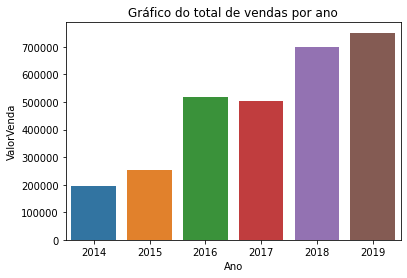

In [96]:
total_vendas_por_ano(dataset)

In [105]:
# B - Faça um gráfico do total de vendas por categoria

def total_vendas_por_categoria(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"]}

    valores = data["ValorVenda"].values.tolist()

    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)

    sns.catplot(x="Categoria", y="ValorVenda", kind="bar", data = dataset, estimator = np.sum).set(title="Total de vendas por categoria")

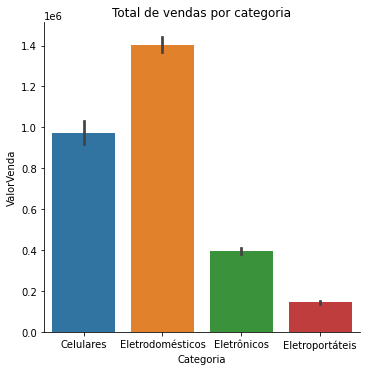

In [106]:
total_vendas_por_categoria(dataset)

In [107]:
# C - Faça um gráfico do total de vendas por categoria por ano

def total_vendas_por_categoria_por_ano(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"]}

    valores = data["ValorVenda"]
    valores = valores.values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    
    sns.catplot(x="Categoria", y="ValorVenda", kind="bar", hue = "Ano", data = dataset, estimator = np.sum).set(title="Total de vendas por categoria por ano")

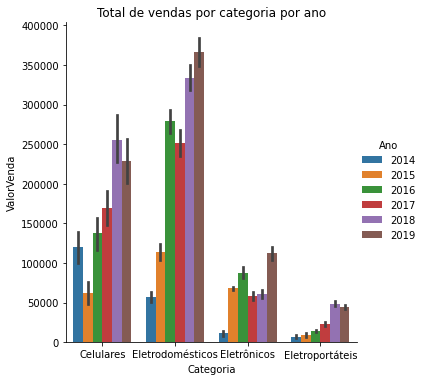

In [108]:
total_vendas_por_categoria_por_ano(dataset)

In [111]:
# D - Faça um gráfico do total de vendas por ano e categoria

def total_vendas_por_ano_e_categoria(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"]}

    valores = data["ValorVenda"]
    valores = valores.values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    
    sns.catplot(x="Ano", y="ValorVenda", kind="bar", hue = "Categoria", data = dataset, estimator = np.sum).set(title="Total de vendas por categoria por ano")

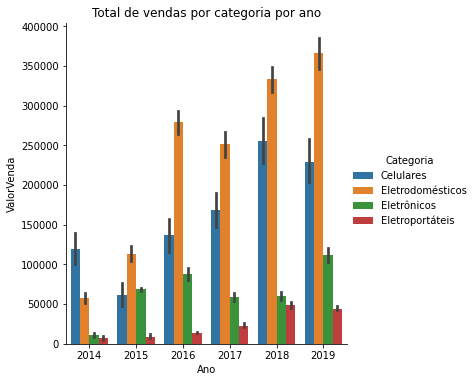

In [112]:
total_vendas_por_ano_e_categoria(dataset)

In [121]:
# E - Faça um gráfico do total de vendas por categoria pelos meses para cada ano

def total_vendas_por_categoria_pelos_meses_para_cada_ano(data):

    dic = {"Ano":data["Ano"],"ValorVenda":[],"Categoria":data["Categoria"],"Mes":data["Mes"]}

    valores = data["ValorVenda"]
    valores = valores.values.tolist()
    for v in range(len(valores)):
        valores[v] = float(valores[v].replace(",", "."))

    dic["ValorVenda"] = valores
    dataset = pd.DataFrame(dic)
    anosSet = [2014,2015,2016,2017,2018,2019]

    for ano in anosSet:
        dataset_for = dataset.loc[dataset["Ano"] == ano]
        
        sns.catplot(x="Ano", y="Mes", kind="bar", hue = "Categoria", data = dataset_for, estimator = np.sum).set(title="Total de vendas por categoria pelos meses para cada ano -> "+str(ano))
        

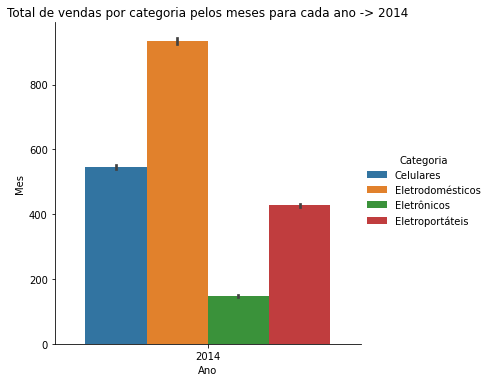

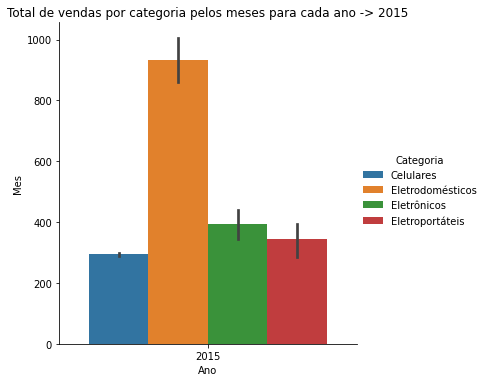

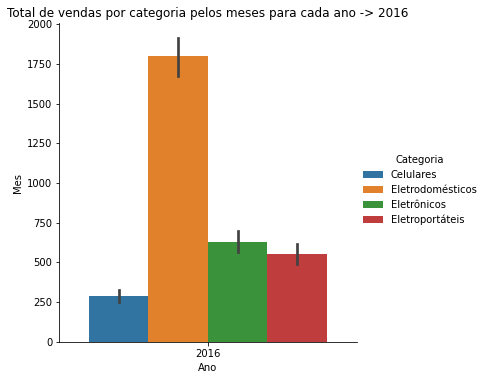

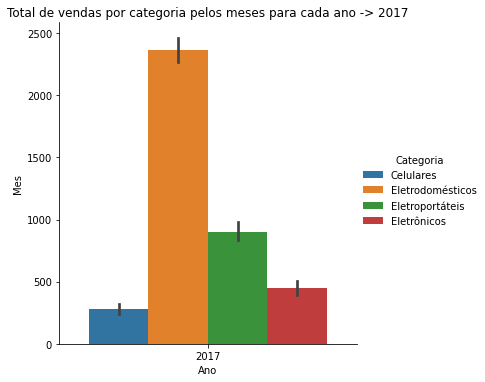

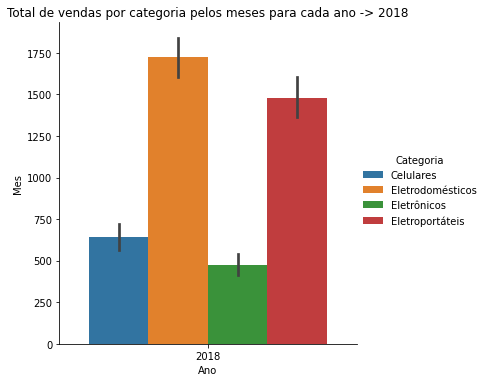

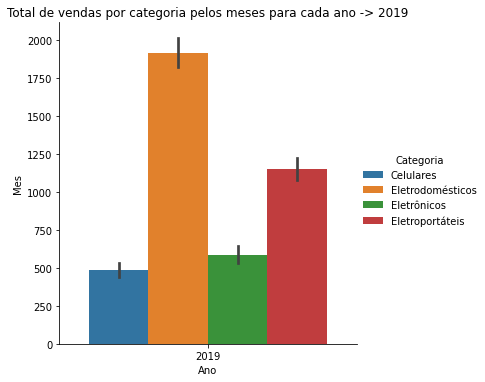

In [122]:
total_vendas_por_categoria_pelos_meses_para_cada_ano(dataset)